In [2]:
import pandas as pd
import seaborn as sb
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
online_data = pd.read_excel('online_retail.xlsx')

In [4]:
online_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [23]:
len(online_data)

541909

In [6]:
main_df = online_data[['Description','InvoiceDate','CustomerID','Country','Quantity','UnitPrice']]

In [7]:
main_df.columns = ['description','invoice_date','cust_id','country','quantity','unit_price']

In [8]:
main_df['tot_order'] = online_data['Quantity']*online_data['UnitPrice']

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
main_df.head()

,description,invoice_date,cust_id,country,quantity,unit_price,tot_order
0,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,17850.0,United Kingdom,6,2.55,15.30
1,WHITE METAL LANTERN,2010-12-01 08:26:00,17850.0,United Kingdom,6,3.39,20.34
2,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,17850.0,United Kingdom,8,2.75,22.00
3,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,17850.0,United Kingdom,6,3.39,20.34
4,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,17850.0,United Kingdom,6,3.39,20.34


In [30]:
refund_df = main_df[main_df['tot_order'] < 0]
refund_df.head()

,cust_id,description,invoice_date,country,quantity,unit_price,tot_order,order_period,cohort_group


In [31]:
main_df = main_df[main_df['tot_order'] > 0]
main_df.head()

,cust_id,description,invoice_date,country,quantity,unit_price,tot_order,order_period,cohort_group
0,17850.0,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,United Kingdom,6,2.55,15.30,2010-12,2010-12
1,17850.0,WHITE METAL LANTERN,2010-12-01 08:26:00,United Kingdom,6,3.39,20.34,2010-12,2010-12
2,17850.0,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,United Kingdom,8,2.75,22.00,2010-12,2010-12
3,17850.0,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,United Kingdom,6,3.39,20.34,2010-12,2010-12
4,17850.0,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,United Kingdom,6,3.39,20.34,2010-12,2010-12


In [32]:
main_df['description'].value_counts().head()

WHITE HANGING HEART T-LIGHT HOLDER    2323
JUMBO BAG RED RETROSPOT               2112
REGENCY CAKESTAND 3 TIER              2017
PARTY BUNTING                         1706
LUNCH BAG RED RETROSPOT               1594
Name: description, dtype: int64

In [33]:
main_df['country'].value_counts().head()

United Kingdom    485123
Germany             9040
France              8407
EIRE                7890
Spain               2484
Name: country, dtype: int64

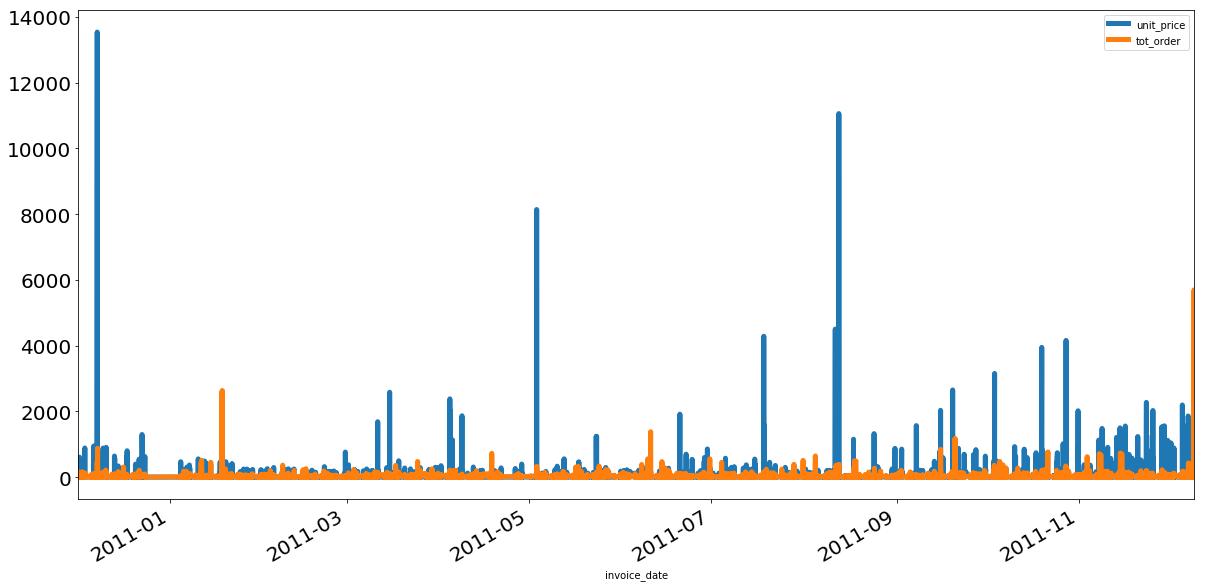

In [47]:
time_df = main_df.set_index('invoice_date')

%matplotlib inline
agg_df = pd.concat([time_df['unit_price'],time_df['tot_order'].rolling(30).mean()], axis = 1)
agg_df.plot(figsize=(20,10), linewidth=5, fontsize=20)

In [55]:
main_df['unit_price'].describe()
len(main_df[main_df['unit_price']>100])

811

In [13]:
main_df['order_period'] = main_df['invoice_date'].apply(lambda x: x.strftime('%Y-%m'))
main_df.head()

,description,invoice_date,cust_id,country,quantity,unit_price,tot_order,order_period
0,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,17850.0,United Kingdom,6,2.55,15.30,2010-12
1,WHITE METAL LANTERN,2010-12-01 08:26:00,17850.0,United Kingdom,6,3.39,20.34,2010-12
2,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,17850.0,United Kingdom,8,2.75,22.00,2010-12
3,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,17850.0,United Kingdom,6,3.39,20.34,2010-12
4,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,17850.0,United Kingdom,6,3.39,20.34,2010-12


In [14]:
main_df.set_index('cust_id', inplace = True)
main_df.head()

,description,invoice_date,country,quantity,unit_price,tot_order,order_period
cust_id,,,,,,,
17850.0,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,United Kingdom,6,2.55,15.30,2010-12
17850.0,WHITE METAL LANTERN,2010-12-01 08:26:00,United Kingdom,6,3.39,20.34,2010-12
17850.0,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,United Kingdom,8,2.75,22.00,2010-12
17850.0,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,United Kingdom,6,3.39,20.34,2010-12
17850.0,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,United Kingdom,6,3.39,20.34,2010-12


In [15]:
main_df['cohort_group'] = main_df.groupby(level=0)['invoice_date'].min().apply(lambda x: x.strftime('%Y-%m'))
main_df.head()

,description,invoice_date,country,quantity,unit_price,tot_order,order_period,cohort_group
cust_id,,,,,,,,
17850.0,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,United Kingdom,6,2.55,15.30,2010-12,2010-12
17850.0,WHITE METAL LANTERN,2010-12-01 08:26:00,United Kingdom,6,3.39,20.34,2010-12,2010-12
17850.0,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,United Kingdom,8,2.75,22.00,2010-12,2010-12
17850.0,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,United Kingdom,6,3.39,20.34,2010-12,2010-12
17850.0,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,United Kingdom,6,3.39,20.34,2010-12,2010-12


In [16]:
main_df.reset_index(inplace = True)
main_df.head()

,cust_id,description,invoice_date,country,quantity,unit_price,tot_order,order_period,cohort_group
0,17850.0,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,United Kingdom,6,2.55,15.30,2010-12,2010-12
1,17850.0,WHITE METAL LANTERN,2010-12-01 08:26:00,United Kingdom,6,3.39,20.34,2010-12,2010-12
2,17850.0,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,United Kingdom,8,2.75,22.00,2010-12,2010-12
3,17850.0,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,United Kingdom,6,3.39,20.34,2010-12,2010-12
4,17850.0,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,United Kingdom,6,3.39,20.34,2010-12,2010-12


In [17]:
grouped = main_df.groupby(['cohort_group','order_period'])
cohorts = grouped.agg({'cust_id': pd.Series.nunique,
                       'description': pd.Series.nunique,
                      'quantity': np.sum,
                      'tot_order': np.sum})
cohorts.rename(columns ={'cust_id':'total_customers',
                         'description':'total_product_types',
                        'quantity':'total_units'}, inplace = True)
cohorts.head()

total_customers  total_product_types  total_units  \
cohort_group order_period                                                      
2010-12      2010-12                 948.0                 2429       296362   
             2011-01                 362.0                 1835       158898   
             2011-02                 317.0                 1721       137581   
             2011-03                 367.0                 1870       179256   
             2011-04                 341.0                 1794       130621   

                           tot_order  
cohort_group order_period             
2010-12      2010-12       554604.02  
             2011-01       271616.52  
             2011-02       230856.22  
             2011-03       302509.39  
             2011-04       200927.98